In [1]:
#importar bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.utils.vis_utils import plot_model
from scipy.optimize import least_squares
from scipy.optimize import leastsq

In [2]:
data = {
  "1-B": [1.96, 3.14, 13.74, 0.40, 12.22],
  "1-M": [4.23, 24.83, 52.99, 11.78, 87.73],
  "1-A": [10.53, 20.99, 32.50, 0.81, 21.85],
  "10-B": [2.60, 3.00, 4.01, 3.76, 8.44],
  "10-M": [20.80, 11.40, 14.83, 14.96, 7.36],
  "10-A": [60.60, 46.19, 28.65, 0.00, 19.05],
  "11-B": [2.41, 3.85, 1.47, 2.77, 1.38],
  "11-M": [4.01, 3.13, 2.91, 3.44, 3.98],
  "11-A": [34.11, 12.84, 8.91, 9.61, 33.75],
  "PCI": [6.70, 5.70, 6.44, 26.75, 2.12]
}
#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

     1-B    1-M    1-A  10-B   10-M   10-A  11-B  11-M   11-A    PCI
0   1.96   4.23  10.53  2.60  20.80  60.60  2.41  4.01  34.11   6.70
1   3.14  24.83  20.99  3.00  11.40  46.19  3.85  3.13  12.84   5.70
2  13.74  52.99  32.50  4.01  14.83  28.65  1.47  2.91   8.91   6.44
3   0.40  11.78   0.81  3.76  14.96   0.00  2.77  3.44   9.61  26.75
4  12.22  87.73  21.85  8.44   7.36  19.05  1.38  3.98  33.75   2.12


In [49]:
#normalização dos dados entre 0 e 1
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
print(df_min_max_scaled)

        1-B       1-M       1-A      10-B      10-M      10-A      11-B  \
0  0.116942  0.000000  0.306721  0.000000  1.000000  1.000000  0.417004   
1  0.205397  0.246707  0.636794  0.068493  0.300595  0.762211  1.000000   
2  1.000000  0.583952  1.000000  0.241438  0.555804  0.472772  0.036437   
3  0.000000  0.090419  0.000000  0.198630  0.565476  0.000000  0.562753   
4  0.886057  1.000000  0.663932  1.000000  0.000000  0.314356  0.000000   

       11-M      11-A       PCI  
0  1.000000  1.000000  0.185952  
1  0.200000  0.155952  0.145351  
2  0.000000  0.000000  0.175396  
3  0.481818  0.027778  1.000000  
4  0.972727  0.985714  0.000000  


In [4]:
# Defina uma função de perda personalizada
def custom_loss(y_true, y_pred): return np.mean(np.square(y_true - y_pred))

In [6]:
# Separar os dados entre feature matrix e target vector
X = df.drop('PCI', axis=1)
y = df['PCI']

In [7]:
# 3.1 Dividir o dataset entre treino e teste
X_train_completo, X_test, y_train_completo, y_test = train_test_split(X, y, train_size=0.7)

In [8]:
# 3.2 Dividir os dados de treino entre treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train_completo, y_train_completo, test_size=0.5)

In [9]:
# 3.3 Padronizar os dados (MUITO importante para redes neurais)
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [10]:
# Defina a arquitetura do modelo
model = keras.models.Sequential()
model.add(keras.layers.Dense(21, input_shape=(X_train.shape[1:]), activation='sigmoid'))
model.add(keras.layers.Dense(21, activation='sigmoid'))
model.add(keras.layers.Dense(1))

In [11]:
# Compile o modelo com a função de perda personalizada
model.compile(optimizer='sgd', loss=custom_loss)

In [12]:
# Inicialize os pesos do modelo
initial_params = model.get_weights()

In [32]:
def model_function(params, x):
  optimized_params, _ = leastsq(func=model_function, x0=initial_params, args=(y,))

In [18]:
def custom_fit(X, y):
  initial_params = custom_fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid))

In [19]:
initial_params = model.get_weights()

In [27]:
# Defina os pesos otimizados no modelo
model.set_weights(initial_params)


In [40]:
def error_function(params, x, y):
    return y - model_function(params, x)


In [41]:
 def model_function(params, x):
  optimized_params, _ = leastsq(error_function, initial_params, args=(X_train, y_train))


In [43]:
print(X_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [44]:
print(y_train)

4    2.12
Name: PCI, dtype: float64


In [45]:
weights = model.layers[0].get_weights()[0]

In [46]:
print(weights)

[[-0.12026519  0.3752768   0.12017274 -0.37644604  0.3400302  -0.1617204
   0.07381272  0.3927381  -0.26380193 -0.00522128  0.06744885  0.25341898
   0.40240365 -0.33688372 -0.36425093 -0.32443634  0.2291717   0.29639518
   0.10450912 -0.41779998 -0.36977726]
 [-0.10608527  0.21788692 -0.13665703 -0.31826964 -0.15738752 -0.303829
  -0.1397661  -0.38347065 -0.10605901  0.40017128  0.1372329   0.05570966
   0.4123215   0.2521118   0.39623588 -0.08553252 -0.24736358  0.13163972
  -0.10792026  0.03557777 -0.30116597]
 [ 0.02434334  0.35572195  0.3487091   0.34838647 -0.29528683 -0.10003084
   0.16250491 -0.23134941 -0.24842983 -0.29880115 -0.03003854 -0.3678414
   0.03308886  0.15784341 -0.34773752  0.33689046  0.3190412   0.032747
  -0.19789954 -0.32668698  0.24057227]
 [ 0.11721593 -0.3470335   0.39141107  0.2221713  -0.00994003  0.12651283
   0.2411117   0.41643047 -0.33189887 -0.05847135 -0.09719133  0.37232184
   0.14184183  0.18696779 -0.0595783  -0.10190177 -0.32222146 -0.2609235
  

In [47]:
dfp=pd.DataFrame(weights)
dfp

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.120265,0.375277,0.120173,-0.376446,0.340030,-0.161720,0.073813,0.392738,-0.263802,-0.005221,...,0.253419,0.402404,-0.336884,-0.364251,-0.324436,0.229172,0.296395,0.104509,-0.417800,-0.369777
1,-0.106085,0.217887,-0.136657,-0.318270,-0.157388,-0.303829,-0.139766,-0.383471,-0.106059,0.400171,...,0.055710,0.412322,0.252112,0.396236,-0.085533,-0.247364,0.131640,-0.107920,0.035578,-0.301166
2,0.024343,0.355722,0.348709,0.348386,-0.295287,-0.100031,0.162505,-0.231349,-0.248430,-0.298801,...,-0.367841,0.033089,0.157843,-0.347738,0.336890,0.319041,0.032747,-0.197900,-0.326687,0.240572
3,0.117216,-0.347034,0.391411,0.222171,-0.009940,0.126513,0.241112,0.416430,-0.331899,-0.058471,...,0.372322,0.141842,0.186968,-0.059578,-0.101902,-0.322221,-0.260924,-0.400345,0.366773,0.144969
4,0.240331,0.244239,-0.239962,-0.049392,0.438591,0.203681,-0.390044,-0.061562,-0.262637,0.245123,...,0.412375,0.268572,0.345121,-0.007954,0.292916,-0.315978,-0.147604,0.149456,-0.387946,-0.043951
5,-0.190150,0.218315,0.081563,-0.235285,0.014748,-0.003219,-0.186972,-0.283716,0.234160,-0.259033,...,0.124968,0.114005,-0.132139,0.215447,0.017296,0.443390,-0.349369,-0.075829,-0.363320,-0.092719
6,-0.034213,-0.005784,-0.241824,-0.090879,0.235868,-0.050831,0.295523,0.069021,-0.074960,0.001582,...,-0.367618,0.291988,0.155958,-0.324738,0.295035,-0.202155,0.172993,0.337076,-0.306157,-0.153119
7,-0.025419,-0.380684,-0.206551,-0.046279,0.234066,-0.268860,-0.392782,-0.101541,0.221134,-0.180302,...,0.389497,-0.231510,-0.168805,0.445697,-0.031342,0.380486,-0.387205,-0.383338,0.319031,0.083142
8,0.209618,-0.277470,-0.388785,0.012249,-0.370800,0.395943,0.027863,-0.260744,0.312699,-0.010145,...,0.105044,0.067000,-0.216762,0.276433,-0.057450,0.084743,0.055358,0.222643,0.361594,-0.220279


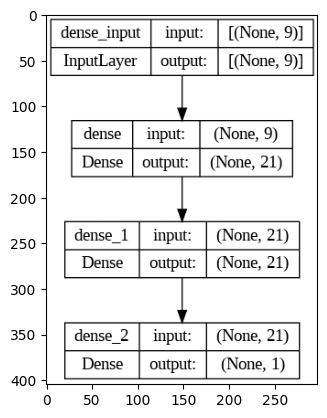

In [48]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
img = plt.imread('model.png')
plt.imshow(img)
plt.show()

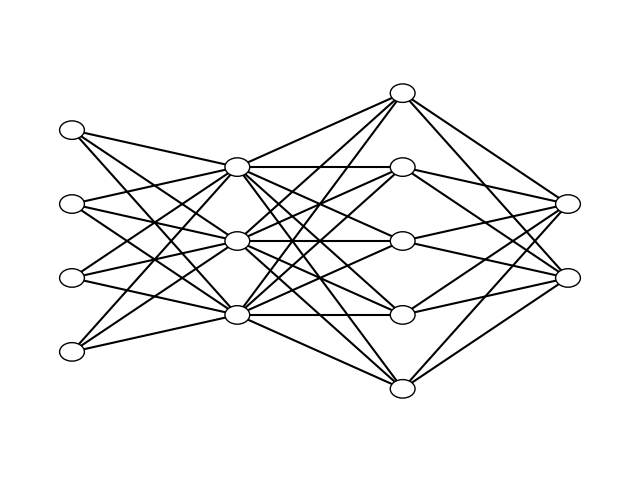

In [51]:
import matplotlib.pyplot as plt

# Exemplo de uma rede neural simples com duas camadas ocultas
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    # Input layer
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 8.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                for o in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left, (n - 1) * h_spacing + left],
                                      [layer_top - m * v_spacing, (v_spacing * (layer_sizes[n - 1] - 1) / 2. +
                                                                    (top + bottom) / 2.) - o * v_spacing],
                                      c='k')
                    ax.add_artist(line)

# Definindo o tamanho das camadas da rede neural
layer_sizes = [4, 3, 5, 2]

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))

# Desenhando a rede neural
draw_neural_net(ax, 0.1, 0.9, 0.1, 0.9, layer_sizes)

# Removendo eixos e mostrando o gráfico
ax.axis('off')
plt.show()
